# **Comunicação e Redes - Algoritmos de Busca e Caminhos Mínimos em Grafos**
---
Esse material aborda como alguns conceitos teóricos estudados na disciplina de Comunicação e Redes podem ser utilizados de forma prática com o uso da biblioteca NetworkX.

#### **Conceitos teóricos abordados:**
*   Caminhos em Grafos
*   Algoritmos de Busca
  *   Busca em Largura (BFS)
  *   Busca em Profundidade (DFS)
*   Algoritmo de Dijkstra
*   Algortimo de Bellman-Ford
*   Distância
*   Caminhos em Digrafos






## **Importação das bibliotecas NetworkX e Matplotlib**
---
A biblioteca NetworkX é um pacote em Python que visa a criação, manipulação e estudo de grafos e redes complexas. Essa biblioteca é muito utilizada em áreas como ciência da computação, análise de redes sociais, bioinformática, pesquisa operacional, entre outras. Já a biblioteca Matplotlib é uma das bibliotecas mais populares para visualização de dados em Python.

A importação das bibliotecas pode ser feita com os comandos:

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

## **Caminhos em grafos**
---
Em muitos problemas que podem ser modelados por grafos, busca-se encontrar caminhos que atendam algumas condições do problema. Uma empresa ao planejar a rota de entrega do dia, por exemplo, tem o objetivo de encontrar o melhor caminho que passe por todos os pontos de entrega.

Um caminho em um grafo é uma sequência de vértices conectados por arestas, de forma que cada vértice não se repete, e as arestas indicam uma conexão direta entre os vértices.

Para explorar alguns algoritmos disponíveis na biblioteca NetworkX para trabalhar com caminhos em grafos, vamos criar um grafo para representar o seguinte problema:

***Imagine que um entregador de aplicativo está em um ponto A de uma cidade e recebe em seu aplicativo a possibilidade de realizar uma entrega. Para isso, o entregador deve se dirigir ao local do restaurante, recolher o pedido e seguir para o endereço final da entrega.***

Note que nesse problema, o motorista terá de escolher dois caminhos. O primeiro caminho será do local em que ele está até o restaurante e o segundo caminho será do restaurante até o endereço final de entrega. A imagem a seguir ilustra esse problema:

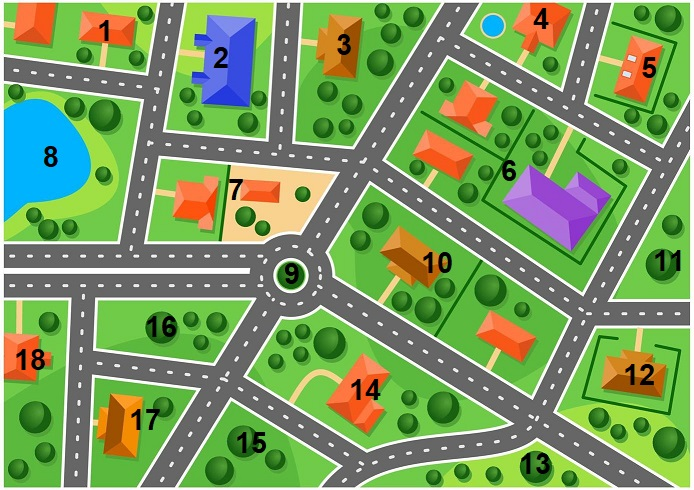

Podemos representar esse problema com um grafo ponderado, de forma que os vértices do grafo representem os pontos da cidade. As arestas serão formadas entre os pontos da cidade que são conectados por ruas e são ponderadas de acordo com o tempo que o entregador leva para ir de um ponto X até outro ponto Y passando por essa rua.

Por meio da descrição do problema e da imagem da cidade, podemos elaborar os dados para a criação do grafo, adicionando os tempos em minutos para ir de um ponto ao outro:

*   A cidade possui 18 pontos (de 1 até 18)
*   Conexões entre os pontos da cidade:
  *   1: (2 - 3 min), (8 - 5 min)
  *   2: (1 - 3 min), (3 - 3 min), (7 - 5 min), (8 - 4 min)
  *   3: (2 - 3 min), (4 - 7 min), (6 - 8 min), (7 - 4 min)
  *   4: (3 - 7 min), (5 - 2 min), (6 - 3 min)
  *   5: (4 - 2 min), (6 - 4 min), (11 - 7 min)
  *   6: (3 - 8 min), (4 - 7 min), (5 - 4 min), (11 - 4 min), (10 - 3 min)
  *   7: (2 - 5 min), (3 - 4 min), (8 - 1 min), (9 - 2 min), (10 - 3 min)
  *   8: (1 - 5 min), (2 - 4 min), (7 - 1 min)
  *   9: (7 - 2 min), (10 - 2 min), (14 - 2 min), (16 - 2 min)
  *   10: (6 - 3 min), (7 - 3 min), (9 - 2 min), (12 - 3 min), (14 - 4 min)
  *   11: (5 - 7 min), (6 - 4 min), (12 - 5 min)
  *   12: (10 - 3 min), (11 - 5 min), (13 - 9 min)
  *   13: (12 - 9 min), (14 - 7 min), (15 - 1 min)
  *   14: (9 - 2 min), (10 - 4 min), (13 - 7 min), (15 - 5 min), (16 - 4 min)
  *   15: (13 - 1 min), (14 - 5 min), (17 - 2 min)
  *   16: (9 - 2 min), (14 - 4 min), (17 - 2 min), (18 - 5 min)
  *   17: (15 - 2 min), (16 - 2 min), (18 - 1 min)
  *   18: (16 - 5 min), (17 - 1 min)







Note que vamos considerar que todas as ruas vão nos dois sentidos. Logo, utilizaremos um grafo simples que pode ser gerado com o código abaixo:

In [5]:
#Criando grafo G
G = nx.Graph()

#Adicionando as arestas ponderadas ao grafo G
G.add_edges_from([(1, 2, {'weight': 3}), (1, 8, {'weight': 5}),
                  (2, 3, {'weight': 3}), (2, 7, {'weight': 5}), (2, 8, {'weight': 4}),
                  (3, 4, {'weight': 7}), (3, 6, {'weight': 8}), (3, 7, {'weight': 4}),
                  (4, 5, {'weight': 2}), (4, 6, {'weight': 3}),
                  (5, 6, {'weight': 4}), (5, 11, {'weight': 7}),
                  (6, 11, {'weight': 4}), (6, 10, {'weight': 3}),
                  (7, 8, {'weight': 1}), (7, 9, {'weight': 2}), (7, 10, {'weight': 3}),
                  (9, 10, {'weight': 2}), (9, 14, {'weight': 2}), (9, 16, {'weight': 2}),
                  (10, 12, {'weight': 3}), (10, 14, {'weight': 4}),
                  (11, 12, {'weight': 5}),
                  (12, 13, {'weight': 9}),
                  (13, 14, {'weight': 7}), (13, 15, {'weight': 1}),
                  (14, 15, {'weight': 5}), (14, 16, {'weight': 4}),
                  (15, 17, {'weight': 2}),
                  (16, 17, {'weight': 2}), (16, 18, {'weight': 5}),
                  (17, 18, {'weight': 1})])

Vamos plotar o grafo gerado para obter uma visão inicial:

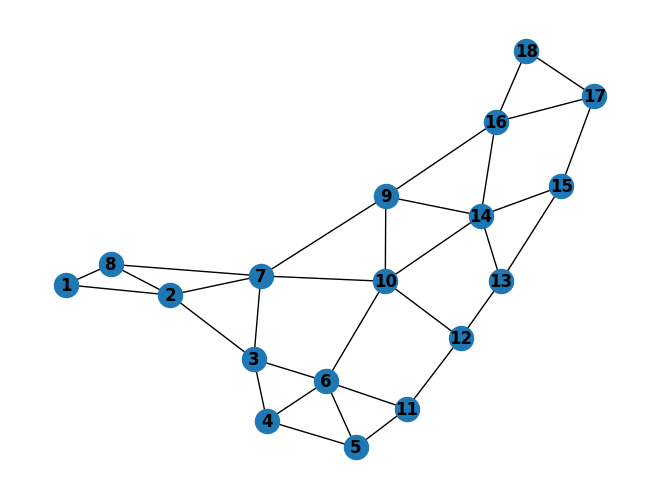

In [6]:
#Plotando o grafo G para o problema do entregador de aplicativo
nx.draw(G, with_labels=True, font_weight='bold')

Com o grafo implementado, podemos utilizá-lo para responder algumas questões desse problema como por exemplo:
*   Se o entregador estiver no ponto X da cidade, qual o melhor caminho até o restaurante?
*   Qual o melhor caminho do restaurante até o endereço de entrega final?

Os algoritmos que veremos nos próximos tópicos vão ser úteis para resolver essas questões.



## **Algoritmos de Busca - Busca em Largura e Busca em Profundidade**
---
Os algoritmos de busca são muito úteis para encontrar caminhos entre vértices em grafos. Eles têm ampla aplicabilidade em problemas práticos, como análise de redes, planejamento de rotas, navegação, e muitos outros.

Tanto o algoritmo de busca em largura, como o de busca em profundidade garantem que sempre vão encontrar um caminho entre dois vértices se esse existir.

A busca em largura percorre o grafo em camadas, explorando todos os vértices vizinhos antes de avançar para os próximos níveis. Ele se torna bem útil para encontrar o caminho mais curto entre dois vértices em grafos não ponderados. Já a busca em profundidade explora o grafo profundamente antes de voltar para explorar outros caminhos.

Vamos iniciar com a busca em largura (BFS) e explorar como podemos utilizá-la para encontrar um caminho entre dois vértices em um grafo:

In [29]:
#Definir os nós de início e fim para o caminho
source = 1
target = 10

#Árvore de busca em largura a partir do nó de origem
bfs_tree = nx.bfs_tree(G, source=source)

#Caminho a partir da árvore da BFS
bfs_path = nx.shortest_path(bfs_tree, source=source, target=target)
print("O caminho encontrado pela BFS é:", bfs_path)

O caminho encontrado pela BFS é: [1, 2, 7, 10]


Podemos plotar o grafo novamente e agora destacando o caminho encontrado pela BFS com o código:

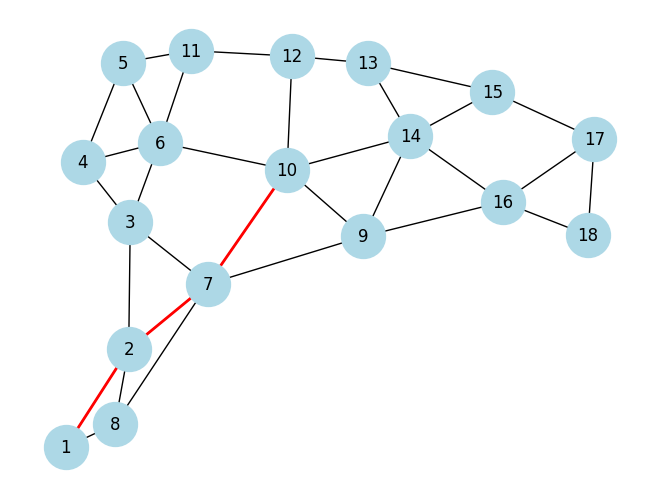

In [30]:
#Plotando o grafo
pos = nx.spring_layout(G)  # Layout para desenhar o grafo
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12)

#Destacando as arestas do caminho encontrado pela BFS
path_edges = list(zip(bfs_path, bfs_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

plt.show()

Vamos agora aplicar uma busca em profundidade (DFS) para encontrar um caminho entre dois vértices e poder analisar os resultados:

In [32]:
#Definir os nós de início e fim para o caminho
source = 1
target = 10

#Árvore de busca em profundidade a partir do nó de origem
dfs_tree = nx.dfs_tree(G, source=source)

#Caminho a partir da árvore da DFS
dfs_path = nx.shortest_path(dfs_tree, source=source, target=target)
print("O caminho encontrado pela DFS é:", dfs_path)

O caminho encontrado pela DFS é: [1, 2, 3, 4, 5, 6, 11, 12, 10]


Vamos também plotar o grafo destacando o caminho encontrado pela busca em profundidade (DFS):

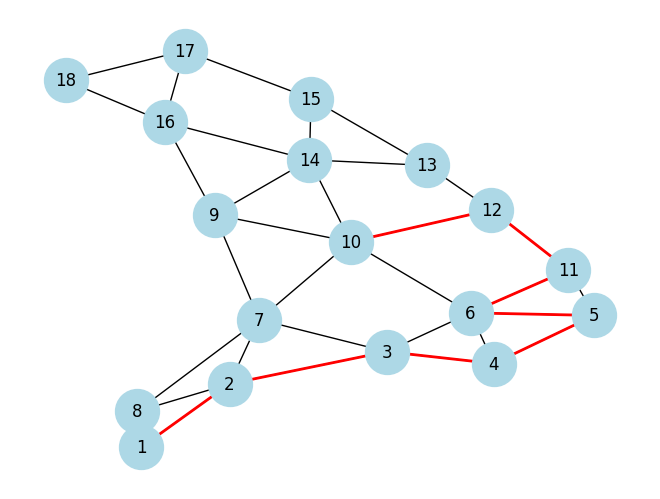

In [33]:
#Plotando o grafo
pos = nx.spring_layout(G)  # Layout para desenhar o grafo
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12)

#Destacando as arestas do caminho encontrado pela DFS
path_edges = list(zip(dfs_path, dfs_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

plt.show()

Apesar dos algoritmos de busca garantirem que um caminho entre dois vértices será encontrado se esse existir, é possível perceber que eles nem sempre fornecem o caminho mínimo entre os vértices. Isso ocorre devido às limitações desses algoritmos.

A busca em largura (BFS) não considera pesos ou custos das arestas. Dessa forma, em grafos ponderados, onde o custo do caminho é determinado pelos pesos, o BFS não garante que o caminho encontrado seja o de custo mínimo.

Já a busca em profundidade (DFS), como ela não explora o grafo de maneira uniforme, pode levar a caminhos mais longos ou mais caros, especialmente em grafos ponderados.

Para garantir que sempre encontremos o caminho mínimo entre dois vértices, vamos utilizar outros algoritmos que veremos a seguir.

## **Algoritmo de Dijkstra**
---
O algoritmo de Dijkstra é um dos algoritmos mais famosos para encontrar o caminho mais curto entre vértices em um grafo ponderado onde todos os pesos das arestas são não negativos. Esse algoritmo usa uma estrutura de dados conhecida como fila de prioridade para manter uma lista ordenada de vértices a serem explorados, sempre escolhendo o vértice com o menor custo para explorar primeiro.

A biblioteca NetworkX disponibiliza diferentes maneiras de aplicar o algoritmo de Dijkstra para encontrar o caminho de menor custo entre vértices. Vamos ver algumas delas:

In [38]:
#Definir os nós de início e fim para o caminho
source = 1
target = 10

#Opção 1 de Dijkstra
print(nx.dijkstra_path(G, source, target, weight='weight'))

#Opção 2 de Dijkstra
print(nx.shortest_path(G, source=source, target=target, weight='weight', method='dijkstra'))

[1, 8, 7, 10]
[1, 8, 7, 10]


As duas opções mostradas no código acima encontram o caminho mínimo entre dois vértices especificados. Uma outra forma de utilizar o algoritmo de Dijkstra é informando apenas o vértice inicial e calculando o caminho mínimo desse vértice para todos os demais:

In [39]:
#Opção 3 de Dijkstra - caminhos de source para todos os demais vértices
print(nx.single_source_dijkstra_path(G, source, cutoff=None, weight='weight'))

{1: [1], 2: [1, 2], 8: [1, 8], 3: [1, 2, 3], 7: [1, 8, 7], 4: [1, 2, 3, 4], 6: [1, 8, 7, 10, 6], 9: [1, 8, 7, 9], 10: [1, 8, 7, 10], 14: [1, 8, 7, 9, 14], 16: [1, 8, 7, 9, 16], 12: [1, 8, 7, 10, 12], 13: [1, 8, 7, 9, 16, 17, 15, 13], 15: [1, 8, 7, 9, 16, 17, 15], 17: [1, 8, 7, 9, 16, 17], 18: [1, 8, 7, 9, 16, 17, 18], 5: [1, 2, 3, 4, 5], 11: [1, 8, 7, 10, 6, 11]}


Também podemos utilizar algumas formas que além de encontrar o caminho mínimo também calculam as distâncias desses caminhos com base nos pesos das arestas:

In [41]:
#Opção 4 de Dijkstra - retorna a distância do caminho mínimo
print(nx.dijkstra_path_length(G, source, target, weight='weight'))

#Opção 5 de Dijkstra - retorna as distâncias de todos caminhos mínimos partindo de source
print(nx.single_source_dijkstra_path_length(G, source, cutoff=None, weight='weight'))

9
{1: 0, 2: 3, 8: 5, 3: 6, 7: 6, 9: 8, 10: 9, 14: 10, 16: 10, 6: 12, 12: 12, 17: 12, 4: 13, 18: 13, 15: 14, 5: 15, 13: 15, 11: 16}


## **Algoritmo de Bellman-Ford**
---
O algoritmo de Bellman-Ford é um algoritmo para encontrar caminhos mínimos em grafos ponderados, mesmo quando esses grafos possuam arestas de peso negativo. Ou seja, ele é bastante utilizado em situações em que o algoritmo de Dijkstra não seria apropriado devido à presença de pesos negativos.

O algoritmo de Bellman-Ford funciona através de uma série de relaxamentos iterativos das arestas do grafo. "Relaxar" uma aresta significa verificar se o custo do caminho para um vértice através de uma determinada aresta é menor do que o custo conhecido anteriormente, e se for, atualiza o custo para esse valor mais baixo.

A biblioteca NetworkX disponibiliza diferentes maneiras de aplicar o algoritmo de Bellman-Ford para encontrar o caminho mínimo entre vértices. Vamos ver algumas delas:

In [42]:
#Definir os nós de início e fim para o caminho
source = 1
target = 10

#Opção 1 de Bellman-Ford
print(nx.bellman_ford_path(G, source, target, weight='weight'))

#Opção 2 de Bellman-Ford
print(nx.shortest_path(G, source=source, target=target, weight='weight', method='bellman-ford'))

[1, 8, 7, 10]
[1, 8, 7, 10]


As duas opções mostradas no código acima encontram o caminho mínimo entre dois vértices especificados. Uma outra forma de utilizar o algoritmo de Bellman-Ford é informando apenas o vértice inicial e calculando o caminho mínimo desse vértice para todos os demais:

In [43]:
#Opção 3 de Bellman-Ford- caminhos de source para todos os demais vértices
print(nx.single_source_bellman_ford_path(G, source, weight='weight'))

{1: [1], 2: [1, 2], 8: [1, 8], 3: [1, 2, 3], 7: [1, 8, 7], 4: [1, 2, 3, 4], 6: [1, 8, 7, 10, 6], 9: [1, 8, 7, 9], 10: [1, 8, 7, 10], 5: [1, 2, 3, 4, 5], 11: [1, 8, 7, 10, 6, 11], 14: [1, 8, 7, 9, 14], 16: [1, 8, 7, 9, 16], 12: [1, 8, 7, 10, 12], 13: [1, 8, 7, 9, 16, 17, 15, 13], 15: [1, 8, 7, 9, 16, 17, 15], 17: [1, 8, 7, 9, 16, 17], 18: [1, 8, 7, 9, 16, 17, 18]}


Também podemos utilizar algumas formas que além de encontrar o caminho mínimo também calculam as distâncias desses caminhos com base nos pesos das arestas:

In [45]:
#Opção 4 de Bellman-Ford - retorna a distância do caminho mínimo
print(nx.bellman_ford_path_length(G, source, target, weight='weight'))

#Opção 5 de Bellman-Ford - retorna as distâncias de todos caminhos mínimos partindo de source
print(nx.single_source_bellman_ford_path_length(G, source, weight='weight'))

9
{1: 0, 2: 3, 8: 5, 3: 6, 7: 6, 4: 13, 6: 12, 9: 8, 10: 9, 5: 15, 11: 16, 14: 10, 16: 10, 12: 12, 13: 15, 15: 14, 17: 12, 18: 13}


## **Aplicando Dijkstra e Bellman-Ford no problema do entregador de aplicativo**
---

Para aplicar os algoritmos de caminhos mínimos que vimos anteriormente (Dijkstra e Bellman-Ford) no problema que criamos do entregador de aplicativo, vamos supor as seguintes condições:

*   **O entregador de aplicativo está com sua moto no ponto 13 da cidade e recebeu a possibilidade de fazer a entrega para um restaurante que fica no ponto 5 da cidade. A entrega final do pedido é no ponto 18 da cidade.**
  *   **Qual o melhor caminho (menos demorado) para o entregador fazer entre o local em que está até o restaurante?**
  *   **Qual o melhor caminho (menos demorado) para o entregador fazer entre o restaurante e o local da entrega final?**
  *   **Qual o tempo mínimo que o entregador vai levar para ir do seu local até o restaurante? E do restaurante até o local de entrega final? E o tempo mínimo total gasto para pegar o pedido no restaurante e concluir a entrega?**




Podemos iniciar a resolução desse problema utilizando os dois algoritmos que vimos para encontrar o caminho menos demorado do ponto 13 até o ponto 5 e do ponto 5 até o ponto 18. Além disso também podemos calcular o tamanho dos caminhos encontrados para responder as demais perguntas:

In [55]:
#Definir os nós de início e fim para o caminhos
source1 = 13
target1 = 5
source2 = 5
target2 = 18

#Caminho mínimo do local do entregador até o restaurante com Dijkstra
print("Caminho mínimo do entregador para o restaurante com Dijkstra:")
path_1 = nx.dijkstra_path(G, source1, target1, weight='weight')
print(path_1)

#Caminho mínimo do local do entregador até o restaurante com Bellman-Ford
print("Caminho mínimo do entregador para o restaurante com Bellman-Ford:")
print(nx.bellman_ford_path(G, source1, target1, weight='weight'))

#Caminho mínimo do restaurante até o cliente final com Dijkstra
print("Caminho mínimo do restaurante até o cliente final com Dijkstra:")
path_2 = nx.dijkstra_path(G, source2, target2, weight='weight')
print(path_2)

#Caminho mínimo do restaurante até o cliente final com Bellman-Ford
print("Caminho mínimo do restaurante até o cliente final com Bellman-Ford:")
print(nx.bellman_ford_path(G, source2, target2, weight='weight'))

Caminho mínimo do entregador para o restaurante com Dijkstra:
[13, 15, 17, 16, 9, 10, 6, 5]
Caminho mínimo do entregador para o restaurante com Bellman-Ford:
[13, 15, 17, 16, 9, 10, 6, 5]
Caminho mínimo do restaurante até o cliente final com Dijkstra:
[5, 6, 10, 9, 16, 17, 18]
Caminho mínimo do restaurante até o cliente final com Bellman-Ford:
[5, 6, 10, 9, 16, 17, 18]


In [52]:
#Tempo mínimo para ir do local do entregador até o restaurante com Dijkstra
print("Tempo mínimo para ir do local do entregador até o restaurante com Dijkstra:")
print(nx.dijkstra_path_length(G, source1, target1, weight='weight'))

#Tempo mínimo para ir do local do entregador até o restaurante com Bellman-Ford
print("Tempo mínimo para ir do local do entregador até o restaurante com Bellman-Ford:")
print(nx.bellman_ford_path_length(G, source1, target1, weight='weight'))

#Tempo mínimo para ir do restaurante até o cliente final com Dijkstra
print("Tempo mínimo para ir do restaurante até o cliente final com Dijkstra:")
print(nx.dijkstra_path_length(G, source2, target2, weight='weight'))

#Tempo mínimo para ir do restaurante até o cliente final com Bellman-Ford
print("Tempo mínimo para ir do restaurante até o cliente final com Bellman-Ford:")
print(nx.bellman_ford_path_length(G, source2, target2, weight='weight'))

Tempo mínimo para ir do local do entregador até o restaurante com Dijkstra:
16
Tempo mínimo para ir do local do entregador até o restaurante com Bellman-Ford:
16
Tempo mínimo para ir do restaurante até o cliente final com Dijkstra:
14
Tempo mínimo para ir do restaurante até o cliente final com Bellman-Ford:
14


In [53]:
#Tempo mínimo total gasto com Dijkstra
print("Tempo mínimo total gasto com Dijkstra:")
print(nx.dijkstra_path_length(G, source1, target1, weight='weight') + nx.dijkstra_path_length(G, source2, target2, weight='weight'))

#Tempo mínimo total gasto com Bellman-Ford
print("Tempo mínimo total gasto com Bellman-Ford:")
print(nx.bellman_ford_path_length(G, source1, target1, weight='weight') + nx.bellman_ford_path_length(G, source2, target2, weight='weight'))

Tempo mínimo total gasto com Dijkstra:
30
Tempo mínimo total gasto com Bellman-Ford:
30


Por fim, podemos plotar o grafo da cidade com a marcação do caminho utilizado para o entregador ir do seu local até o restaurante em vermelho e para o caminho do restaurante até o local de entrega final com tracejado:

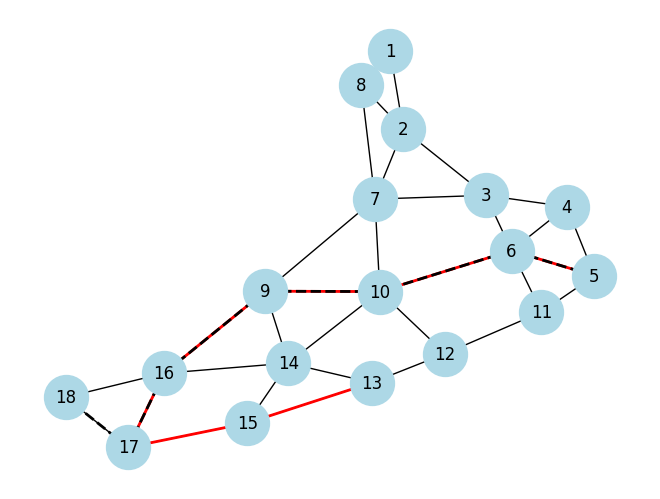

In [59]:
#Plotando o grafo
pos = nx.spring_layout(G)  # Layout para desenhar o grafo
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12)

#Destacando as arestas do caminho entre o entregador e o restaurante
path_1_edges = list(zip(path_1, path_1[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_1_edges, edge_color='red', width=2)

#Destacando as arestas do caminho entre o restaurante e o cliente final
path_2_edges = list(zip(path_2, path_2[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_2_edges, style='dashed', width=2)

plt.show()

## **Caminhos mínimos em digrafos**
---

Os algoritmos de Dijkstra e de Bellman-Ford podem ser aplicados também em grafos direcionados. Esses algoritmos respeitam as direções das arestas no digrafo de forma que o caminho mínimo encontrado permaneça válido, obedecendo o direcionamento do digrafo.

## **Referências**
---
1.   NetworkX Documentation. Disponível em: [https://networkx.org/documentation/stable/index.html](https://networkx.org/documentation/stable/index.html)
2.   Slides do professor Alexandre Donizeti Alves
3.   Slides do professor João Henrique Kleinschmidt
4.   ZINOVIEV, Dmitry. Complex Network Analysis in Python: Recognize, Construct, Visualize, Analyse, Interpret. The Pragmatic Programmers, 2018.

**Produzido por:** Leonardo Severgnine Maioli

**Contato:** leo.severgnine@gmail.com